<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Logistic_Regression_Pima_Indians_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will repeat the Pima Indians excercise with PCA. As this is a low dimensional problem we think that applying PCA will not change a lot. It is mainly to get familiar with PCA and the associated code. 


We will add sklearn's PCA library

In [0]:
import numpy as np #linear algebra library of Python
import pandas as pd # build on top of numpy for data analysis, data manipulation and data visualization
import matplotlib.pyplot as plt #plotting library of Python

Now let's mount Google drive so that we can upload the diabetes.csv file. You can find the code in the 'Code snippets' tab of Colab

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


First thing that we do is take a look at the shape of the dataframe (df.shape) and take a look at first 5 lines through df.head()

In [0]:
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/diabetes.csv') #import file from Google Drive and create a pandas dataframe df
df.head() #shows first 5 lines including column namesdf.shape # number of rows and columns of dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
df.shape # provides # rows and # columns of the dataframe df - 768 rows and 9 columns

(768, 9)

Now we will assess if the dataset has the same proportion of diabetes vs. non-diabetes cases.
At the same time we will look if there are missing values. In our dataset we note that woman #2 has a skin thickness of zero and this is not realistic. It leads us to believe that there are a few zero entries that signal that no data was available. This does not apply to columns columns 1 and 9 for obvious reasons.

We use a trick to count the non-zero values of the columns. We convert the data type of the dataframe df to to Boolean using df.astype(bool) coverting all zero values to false=0 and all other entries to true=1 . We subsequently add up all True entries per column.

In [0]:
df.astype(bool).sum(axis=0) # counts the number of non-zeros for each column while acting on all rows - default value is True(1) so all 1s are added per column

Pregnancies                 657
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Outcome                     268
dtype: int64

The dataframe is unbalanced as we have 268 ones (diabetes) and thus 500 zeros (no diabetes). 

The easiest option could be to eliminate all those patients with zero values, but in this way we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute the zero values for the columns by that median value.

In [0]:
median_BMI=df['BMI'].median()
df['BMI']=df['BMI'].replace(to_replace=0, value=median_BMI)

median_BloodPressure=df['BloodPressure'].median()
df['BloodPressure']=df['BloodPressure'].replace(to_replace=0, value=median_BloodPressure)

median_Glucose=df['Glucose'].median()
df['Glucose']=df['Glucose'].replace(to_replace=0, value=median_Glucose)

median_SkinThickness=df['SkinThickness'].median()
df['SkinThickness']=df['SkinThickness'].replace(to_replace=0, value=median_SkinThickness)

median_Insulin=df['Insulin'].median()
df['Insulin']=df['Insulin'].replace(to_replace=0, value=median_Insulin)

In [0]:
df.head() #shows first 5 lines including column names

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


The skin thickness of woman #2 is now 23 (median of that column)

Let's create numpy arrays, one for the features (X) and one for the label (y)



In [0]:
X=df.drop('Outcome', 1).values #drop 'Outcome' column but you keep the index column
y=df['Outcome'].values

We import the train_test_split function from sklearn to split the arrays or matrices into random train and test subsets>

Parameters:	
test_size : in our case 20% (default=0.25)

random_state: is basically used for reproducing your problem the same every time it is run. If you do not use a random_state in train_test_split, every time you make the split you might get a different set of train and test data points and will not help you in debugging in case you get an issue. We used random_state=42 but number does not matter

stratify : array-like or None (default=None)
If the number of values belonging to each class are unbalanced, using stratified sampling is a good thing. You are basically asking the model to take the training and test set such that the class proportion is same as of the whole dataset, which is the right thing to do.

In [0]:
from sklearn.model_selection import train_test_split #method to split training and testing data sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [0]:
print(X_train)

[[1.00e+00 9.00e+01 6.20e+01 ... 2.72e+01 5.80e-01 2.40e+01]
 [5.00e+00 1.26e+02 7.80e+01 ... 2.96e+01 4.39e-01 4.00e+01]
 [2.00e+00 1.05e+02 5.80e+01 ... 3.49e+01 2.25e-01 2.50e+01]
 ...
 [1.00e+00 9.70e+01 7.00e+01 ... 3.81e+01 2.18e-01 3.00e+01]
 [1.00e+01 1.11e+02 7.00e+01 ... 2.75e+01 1.41e-01 4.00e+01]
 [4.00e+00 1.44e+02 5.80e+01 ... 2.95e+01 2.87e-01 3.70e+01]]


In [0]:
print(X_test)

[[  7.    159.     64.    ...  27.4     0.294  40.   ]
 [ 10.     68.    106.    ...  35.5     0.285  47.   ]
 [  2.    122.     76.    ...  35.9     0.483  26.   ]
 ...
 [  2.     82.     52.    ...  28.5     1.699  25.   ]
 [  4.    184.     78.    ...  37.      0.264  31.   ]
 [  1.     71.     78.    ...  33.2     0.422  21.   ]]


Now we are ready to use Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.7207792207792207


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now we will look at other classification KPIs that we discussed in our lessons: Confusion Matrix, ROC, AUC, F1-Score

In [0]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[86, 14],
       [29, 25]])

Classifier not so good: true positives=25, true negatives=86, false positives=14 and false negatives=29. We cannot accept the numerous False Negatives (FNs) in this case as we would tell a women that she is not diabetic whereas she actually is diabetic. One option to reduce the FNs is to change the threshold of the classifier but this will increase the amount of False Positives (FPs) as we have seen in lesson 3. Recall in our case is TP/(TP+FN) = 46% and this is too high. Precission is TP/(TP+FP)=64%

ROC (Receiver Operating Characteristic) curve

It is a plot of Recall vs. False Positive Rate (FPR) for the different possible thresholds of the classifier. It shows the tradeoff between Recall and Precision. The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test. The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test. The area under the curve is a measure of test accuracy.

In [0]:
from sklearn.metrics import roc_curve
y_pred_proba=model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)

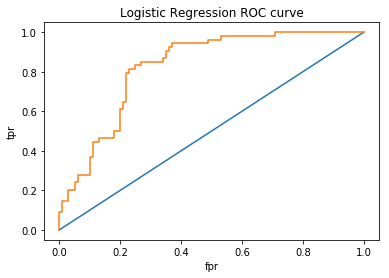

In [0]:
plt.plot([0,1], [0,1], '')
plt.plot(fpr, tpr, label='')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Logistic Regression ROC curve')
plt.show()

In [0]:
from sklearn.metrics import roc_auc_score #area under the ROC curve
roc_auc_score(y_test, y_pred_proba)

0.825925925925926